### Task 1:

##### Green Screen Effect
- Merge two images to create a composite image
- Green pixels are substituted by background pixels

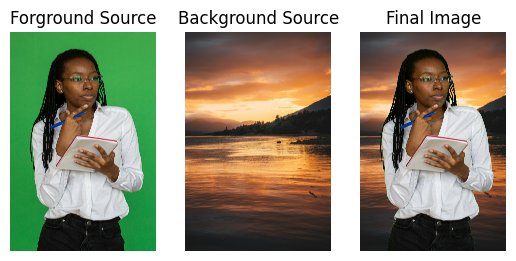

<Figure size 640x480 with 0 Axes>

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def plotter(images, row, columns, titles):
    for i in range(len(images)):
        plt.subplot(row, columns, i + 1)
        plt.imshow(images[i])
        plt.title(titles[i])
        plt.axis("off")

    plt.show()

imgT1Foreground = cv2.imread("Pexels_Edited_Greenscreen_Foreground.jpg")
imgT1ForegroundHSV = cv2.cvtColor(imgT1Foreground, cv2.COLOR_BGR2HSV)

imgT1Background = cv2.imread("Pexels_Background.jpg")
imgT1BackgroundRGB = cv2.cvtColor(imgT1Background, cv2.COLOR_BGR2RGB)

lowerGreen = np.array([35, 100, 100])
upperGreen = np.array([85, 255, 255])

mask = cv2.inRange(imgT1ForegroundHSV, lowerGreen, upperGreen)
maskInverted = cv2.bitwise_not(mask)

forgroundIsolated = cv2.bitwise_and(imgT1ForegroundHSV, imgT1ForegroundHSV, mask=maskInverted)
forgroundIsolatedRGB = cv2.cvtColor(forgroundIsolated, cv2.COLOR_HSV2RGB)

backgroundInvertedMaskRGB = cv2.bitwise_and(imgT1BackgroundRGB, imgT1BackgroundRGB, mask=mask)

finalImage = cv2.add(forgroundIsolatedRGB, backgroundInvertedMaskRGB)

imgT1ForegroundRGB = cv2.cvtColor(imgT1Foreground, cv2.COLOR_BGR2RGB)

plotter([imgT1ForegroundRGB, imgT1BackgroundRGB, finalImage], 1, 3, ["Forground Source", "Background Source", "Final Image"])
plt.subplots_adjust(left=0.05, right=0.95)

### Task 2: Monadic Image Processing

i) Changing Data Type<br>
ii) Brightness<br>
iii) Contrast<br>
iv) Negative/Inverse Transformation<br>
v) Gamma Correction / Power Law Transformation<br>
vi) Logarithmic Transformation

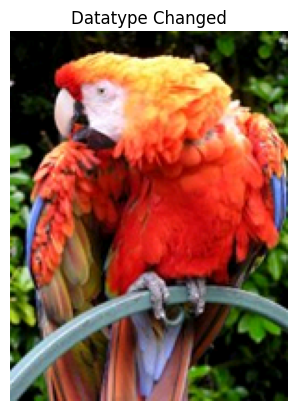

In [5]:
imgT2 = cv2.imread("RGB_Bit_Depth_24.png")

imgT2.astype(np.float32)

imgT2RGB = cv2.cvtColor(imgT2, cv2.COLOR_BGR2RGB)

plotter([imgT2RGB], 1, 1, ["Datatype Changed"])


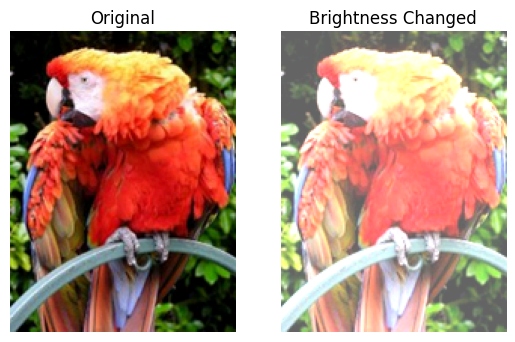

In [86]:
brightness_val = 100

imgT2BrightnessChanged = cv2.add(imgT2RGB, np.full(imgT2RGB.shape, brightness_val, dtype=np.uint8))

plotter([imgT2RGB, imgT2BrightnessChanged], 1, 2, ["Original", "Brightness Changed"])

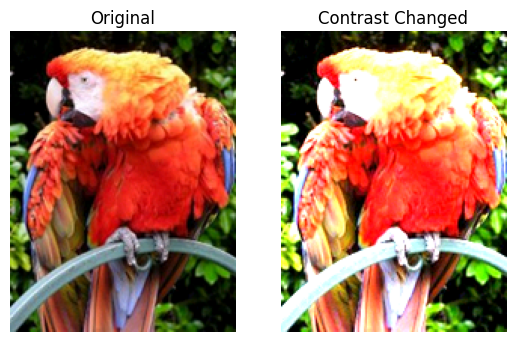

In [87]:
contrast_scale = 1.99

imgT2ContrastChanged = np.clip(contrast_scale * imgT2RGB, 0, 255).astype(np.uint8)

plotter([imgT2RGB, imgT2ContrastChanged], 1, 2, ["Original", "Contrast Changed"])

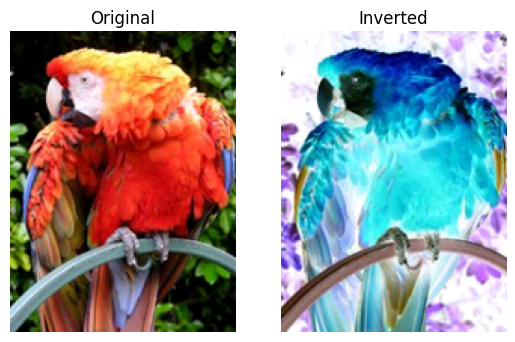

In [88]:
imgT2Inverted = 255 - imgT2RGB

plotter([imgT2RGB, imgT2Inverted], 1, 2, ["Original", "Inverted"])

### Task 3: Monadic Image Processing

i) Detection of movement in a scene through subsequent frames subtraction<br>
ii) Detection of object in video frames through frame differencing & thresholding<br>
iii) Addition<br>
iv) Subtraction<br>
v) Multiplication<br>
vi) Division